# Investigating Fandango movie ratings

## Introduction

In October 2015, a data jurnalist Walt Hickey analyzed movie rating data on Fandango. He discovered that the rating system was biased [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Fandango officialy replied that the biased was caused by a bug in their system. We are going to analyse more recent rating data to determine whether there has beed any change in Fandango's rating system since that.

### Summary of results

Fandando is still less critical then other portals. Movies from 2016 were lower ranked on all portals which can indicate that 2015's movies were more successful.

## Data exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rating_past = pd.read_csv('data//fandango_score_comparison.csv')
rating_current = pd.read_csv('data//movie_ratings_16_17.csv')

In [15]:
rating_past

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [9]:
rating_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [11]:
rating_current

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


In [13]:
rating_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


### Data cleaning

In [17]:
fandango_past = rating_past[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_current = rating_current[['movie', 'year', 'fandango']].copy()

In [18]:
fandango_past['year'] = fandango_past['FILM'].str.extract(r'\((\d{4})\)')

In [22]:
fandango_past.year.unique()

array(['2015', '2014'], dtype=object)

fandango_past dataset contains data on movies released between 2014-2015. While fandango_current has data on movies released between 2016-2017. So we can't directly compare title to title to see the difference. Furthermore both datasets contain samles consisted of only most popular movies in given years. Which means that they are not a random samples. Both authors used purposive sampling which were good enough to let them check their hypothesis they are not representative for our resarch. Not all movies had equal chance to be selected.

We could have scrapped a new data containing only the same movies as in fandango_past dataset to be able to compare them to see any change in rating score taking into account remaining webpages and calculating any changes.

Once that is a time consuming process another solution may be to change our goal by applying some limitations on it.
Once both datasets consists ratings of most popular movies in given years from different portals we can possibly compare rating of most popular movies on Fandango to IMDB, Rotten Tomatoes etc.

In [42]:
fandango2015 = fandango_past[fandango_past['year'] == '2015'].copy()
fandango2016 = fandango_current[fandango_current['year'] == 2016].copy()

In [47]:
# Checking min 
rating_past['Fandango_votes'].min()

35

For fandango_past we have selected only movies from 2015. We have also check if all are above 30 votes on Fandango. For the second dataset we isolated only movies from 2016. We can't check if all were voted by more then 30 users. Possibly we could take a random sample of it and check on Fandango manually but a lot of stuff could change sicne the dataset was collected. 

## Data analysis

### Fandango 2015 vs 2016 ranking distribution 

Text(0.5, 0, 'Rating')

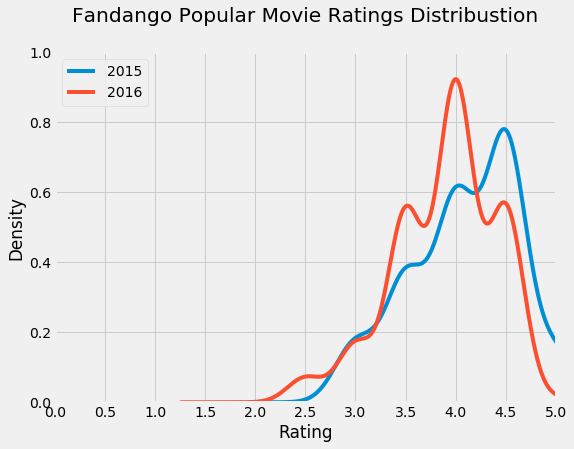

In [172]:
plt.style.use('fivethirtyeight')
ax = fandango2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(8,6))
ax = fandango2016['fandango'].plot.kde(label='2016',legend=True,figsize=(8,6))
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.set_title('Fandango Popular Movie Ratings Distribustion',y=1.07)
ax.legend()
plt.xlabel('Rating') 

As we can see on above kernel density plot. Most of the popular movie in 2015 were ranked at 4.5 points while in 2016 popular movies are ranked mostly at 4 stars. The distribution on movie's ranks in 2016 is closer to normal distribution curve while in 2015 it was skewed towards to high rank. Lets take a closer look at the frequency distribution.

In [104]:
# frequency distribution table for popular movie in 2015
fandango2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [105]:
# frequency distribution table for popular movie in 2016
fandango2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

### Fandango 2015 vs 2016 summary statistics
Based on above two frequency distributions tables we can confirm that popular movies in 2016 were ranked lower then ones from 2015 dataset. Lets now compare some more statistics like mean, median and mode.

In [126]:
#Statistics for 2015
fandango2015_mean = fandango2015['Fandango_Stars'].mean()
fandango2015_median = fandango2015['Fandango_Stars'].median()
fandango2015_mode = fandango2015['Fandango_Stars'].mode().tolist()[0]

#Statistics for 2016
fandango2016_mean = fandango2016['fandango'].mean()
fandango2016_median = fandango2016['fandango'].median()
fandango2016_mode = fandango2016['fandango'].mode().tolist()[0]

fandango_stat = pd.DataFrame({'2015':[fandango2015_mean,fandango2015_median,fandango2015_mode],'2016':[fandango2016_mean,fandango2016_median,fandango2016_mode]},index=['Mean','Median','Mode'])
fandango_stat

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


Text(0.5, 1.07, 'Comparing summary statistics 2015 vs 2016')

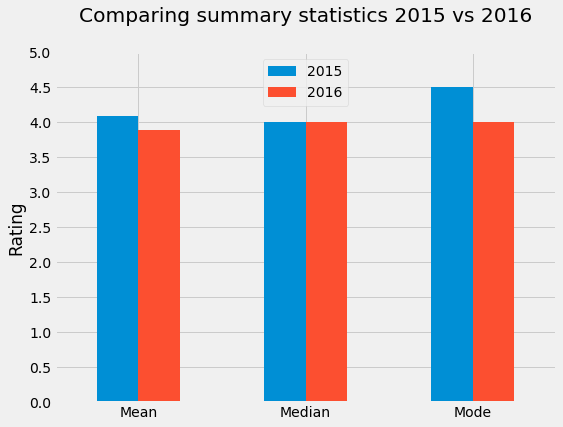

In [173]:
plt.style.use('fivethirtyeight')
ax =fandango_stat.plot.bar(figsize=(8,6),rot=0)
ax.set_ylim(0,5)
ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.legend(loc='upper center')
plt.ylabel('Rating')
plt.title('Comparing summary statistics 2015 vs 2016',y=1.07)

### Fandango vs other portals ranks
To finally confirm our theory lets compare 2016 movies od different portals to see whether Fandango is stil skewed towards high rank.

In [162]:
ranking_col = ['fandango','nr_metascore','nr_imdb','nr_audience']
movies2016 = rating_current.loc[rating_current['year']==2016,ranking_col].copy()

In [165]:
movies2016.head()

,fandango,nr_metascore,nr_imdb,nr_audience
0,3.5,4.0,3.5,4.0
1,4.5,2.5,3.5,4.0
2,3.0,2.5,3.5,2.5
4,3.0,3.0,3.0,3.0
5,4.0,4.0,4.0,4.0


In [188]:
rating_col = ['IMDB_norm_round','RT_user_norm_round','Metacritic_norm_round','Fandango_Stars']
rating_past['year'] = rating_past['FILM'].str.extract(r'\((\d{4})\)')
movies2015 = rating_past.loc[rating_past['year']=='2015',rating_col].copy()

In [190]:
movies2015.head()

,IMDB_norm_round,RT_user_norm_round,Metacritic_norm_round,Fandango_Stars
0,4.0,4.5,3.5,5.0
1,3.5,4.0,3.5,5.0
2,4.0,4.5,3.0,5.0
3,2.5,4.0,1.0,5.0
4,2.5,1.5,1.5,3.5


Text(0.5, 0, 'Rating')

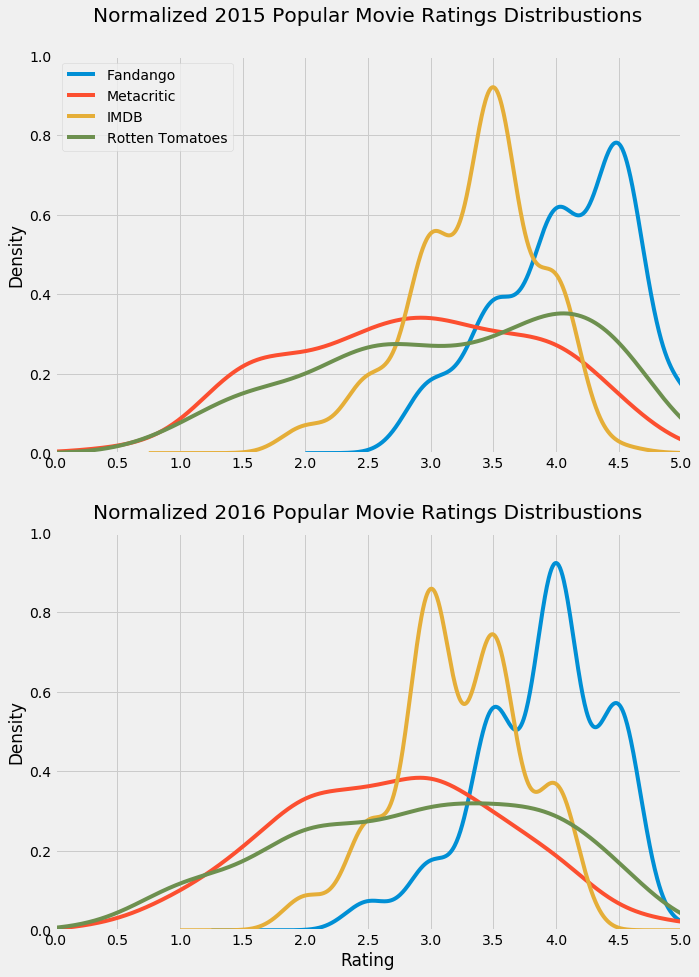

In [197]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(2,1,1)
ax = movies2015['Fandango_Stars'].plot.kde(label='Fandango',legend=True)
ax = movies2015['Metacritic_norm_round'].plot.kde(label='Metacritic',legend=True)
ax = movies2015['IMDB_norm_round'].plot.kde(label='IMDB',legend=True)
ax = movies2015['RT_user_norm_round'].plot.kde(label='Rotten Tomatoes',legend=True)
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.set_title('Normalized 2015 Popular Movie Ratings Distribustions',y=1.07)
ax.legend()
plt.xlabel('') 
ax = fig.add_subplot(2,1,2)
ax = movies2016['fandango'].plot.kde(label='Fandango')
ax = movies2016['nr_metascore'].plot.kde(label='Metacritic')
ax = movies2016['nr_imdb'].plot.kde(label='IMDB')
ax = movies2016['nr_audience'].plot.kde(label='Rotten Tomatoes')
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.set_title('Normalized 2016 Popular Movie Ratings Distribustions',y=1.02)
plt.xlabel('Rating')

## Conclusion

As mean and median ale almost the same for 2015 and 2016 Fandando ranks we can see a differenc in Mode. The most frequent rank in 2015 was 4.5 while in 2016 it is 4.0. As we could observe on the distribution plot most popular movies were ranked lower in 2016 then 2015. If we compare popular movies ranking distribution between different webpages in 2015 and 2016 we can see that in general in 2016 all portals are more critical. We can conclude that Fandando is still most positive in ranks. Our analsysis may just prove that in 2016 worst movies were issued compare to 2015.